<a href="https://colab.research.google.com/github/JulianoMata/projeto_final_mod05/blob/main/Projeto_Mod05_Grupo08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color="cian"> Descrição do Projeto:</font>

## <font color="green">I - Introdução</font>

* Você e sua equipe foram escalados pela Procuradoria Geral da República
para investigarem os gastos dos parlamentares brasileiros nos anos de
2019, 2020 e 2021. Para isso vocês devem utilizar o conjunto de dados
sobre a `Cota para o Exercício da Atividade Parlamentar`, a `CEAP`. Em
resumo, a `CEAP` pode ser definida como: “cota única mensal destinada a
custear os gastos dos deputados exclusivamente vinculados ao exercício
da atividade parlamentar.” Essa ajuda de custo para os nossos
digníssimos representantes podem cobrir despesas com alimentação,
transporte, hospedagem, consultoria técnica, combustíveis e entre outras.

* A `CEAP` é regida por uma série de regras que podem ser consultadas [aqui](https://www2.camara.leg.br/legin/int/atomes/2009/atodamesa-43-21-maio-2009-588364-norma-cd-mesa.html).
Há algumas iniciativas, como o [Serenata de Amor](https://serenata.ai/), que visam acompanhar os gastos realizados pelos nossos políticos e podem ser utilizadas para auxiliar na geração de insights.

* A fonte dos dados podem ser conferidas [aqui](https://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/dados-abertos-cota-parlamentar), assim como dicionário de
dados podem ser visualizados [aqui](https://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/explicacoes-sobre-o-formato-dos-arquivos-xml). Contudo, para facilitar o trabalho de vocês, os dados já estão disponibilizados [aqui](https://drive.google.com/drive/u/7/folders/1H_uQc8UTzA1is3jjZjmrFRIabiOUHoIi), nos arquivos: Ano-2019.csv, Ano-2020.csv e Ano-2021.

##<font color="green">II - As perguntas a serem respondidas são:</font>

1. Como se comportam os gastos com cotas parlamentares ao longo
do tempo? Existe alguma tendência de aumento ou redução desse
custo?
2. Qual a média de gastos por parlamentar?
3. Quais foram os parlamentares que mais e que menos consumiram
recursos?
4. Quais são as categorias de despesas mais onerosas dentre os
recursos destinados às cotas parlamentares?
5. Quais são os trechos de viagem mais recorrentes entre as despesas
de viagem?
6. Qual a média de gastos por estado?
7. Qual é o valor total de gastos por estado?
8. Quais estados têm maior número de representantes?
9. Há alguma correlação entre a quantidade de parlamentares por
estado e o valor total dos gastos?
10. Qual a média de gastos por partido?
11. Quais são os partidos que mais e que menos consumiram a
cota parlamentar?
12. Há alguma correlação entre a quantidade de parlamentares
por partido e o valor total dos gastos?

## <font color="green">III - O projeto deverá </font><font color='red'>obrigatoriamente:</font>


* Utilizar Jupyter Notebook ou Colab;
* Realizar a limpeza dos dados;
* Realizar análise exploratório;
* Responder cada uma das perguntas com a visualização mais adequada;
* O notebook utilizado na análise deve estar organizado, com descrições
do passo a passo da análise em markdown, apresentação dos resultados e
insights gerados;
* Levantar mais duas perguntas e respondê-las com a visualização mais
adequada.
Apresentação:
* Todos os integrantes do grupo deverão apresentar
* Apresente a análise realizada e organizada no Jupyter Notebook ou
Colab
* Utilize slides de apoio para sua apresentação
* Seu grupo terá 15 minutos (no máximo) para apresentar

## <font color="green">IV - Dicionário </font>


In [3]:
#Bibliotecas úteis
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
dicionario = pd.read_csv("/content/dicionario_utf-8.csv", sep=';')
df_dicionario = pd.DataFrame(dicionario)
df_dicionario.style.set_properties(**{"text-align": "left"})

,Elemento de Dado,Nome do Dado,Definição do Dado
0,txNomeParlamentar,Nome Parlamentar,"Nome adotado pelo Parlamentar ao tomar posse do seu mandato. Compõe-se de dois elementos: um prenome e o nome; dois nomes; ou dois prenomes, salvo, a juízo do Presidente da Casa legislativa, que poderá alterar essa regra para que não ocorram confusões."
1,ideCadastro,Identificador Único do Parlamentar,Número que identifica unicamente um deputado federal na CD.
2,nuCarteiraParlamentar,Número da Carteira Parlamentar,Documento usado para identificar um deputado federal na CD. Pode alterar a cada Legislatura nova.
3,nuLegislatura,Número da Legislatura,"Legislatura: Período de quatro anos coincidente com o mandato parlamentar dos Deputados Federais. No contexto da cota CEAP, representa o ano base de início da legislatura e é utilizado para compor a Carteira Parlamentar, pois esta poderá ser alterada à medida que se muda de Legislatura."
4,sgUF,Sigla da UF,"No contexto da cota CEAP, representa a unidade da federação pela qual o deputado foi eleito e é utilizada para definir o valor da cota a que o deputado tem."
5,sgPartido,Sigla do Partido,"O seu conteúdo representa a sigla de um partido. Definição de partido: é uma organização formada por pessoas com interesse ou ideologia comuns, que se associam com o fim de assumir o poder para implantar um programa de governo. Tem personalidade jurídica de direito privado e goza de autonomia e liberdade no que diz respeito à criação, organização e funcionamento, observados os princípios e preceitos constitucionais."
6,codLegislatura,Código da Legislatura,"Legislatura: Período de quatro anos coincidente com o mandato parlamentar dos Deputados Federais. No contexto da cota CEAP, o seu conteúdo representa o código identificador da Legislatura, que um número ordinal sequencial, alterado de um em um, a cada início de uma nova Legislatura (por exemplo, a Legislatura que iniciou em 2011 é a 54ª Legislatura)."
7,numSubCota,Número da Subcota,"No contexto da Cota CEAP, o conteúdo deste dado representa o código do Tipo de Despesa referente à despesa realizada pelo deputado e comprovada por meio da emissão de um documento fiscal, a qual é debitada na cota do deputado."
8,txtDescricao,Descrição da Subcota,O seu conteúdo é a descrição do Tipo de Despesa relativo à despesa em questão.
9,numEspecificacaoSubCota,Número da Especificação da Subcota,"No contexto da Cota CEAP, há despesas cujo Tipo de Despesa necessita ter uma especificação mais detalhada (por exemplo, “Combustível”). O conteúdo deste dado representa o código desta especificação mais detalhada."


# <font color="cian">DataFrame 2019</font>

In [5]:
dados_2019 = pd.read_csv("/content/Ano_2019.csv", sep=';')
df_2019 = pd.DataFrame(dados_2019)

In [6]:
df_2019.head()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LID.GOV-CD,NaN,NaN,NaN,2015,NaN,NaN,55,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1554246,NaN,NaN,2812,6738121,http://camara.leg.br/cota-parlamentar/nota-fis...
1,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570078,NaN,NaN,2812,6769606,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1570503,NaN,NaN,2812,6771099,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1579375,NaN,NaN,2812,6793690,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2019,0,NaN,NaN,1590980,NaN,NaN,2812,6821674,http://camara.leg.br/cota-parlamentar/nota-fis...


In [7]:
df_2019.shape

(288992, 31)

In [8]:
display(df_2019.dtypes)

txNomeParlamentar             object
cpf                          float64
ideCadastro                  float64
nuCarteiraParlamentar        float64
nuLegislatura                  int64
sgUF                          object
sgPartido                     object
codLegislatura                 int64
numSubCota                     int64
txtDescricao                  object
numEspecificacaoSubCota        int64
txtDescricaoEspecificacao     object
txtFornecedor                 object
txtCNPJCPF                    object
txtNumero                     object
indTipoDocumento               int64
datEmissao                    object
vlrDocumento                 float64
vlrGlosa                     float64
vlrLiquido                   float64
numMes                         int64
numAno                         int64
numParcela                     int64
txtPassageiro                 object
txtTrecho                     object
numLote                        int64
numRessarcimento             float64
v

In [9]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288992 entries, 0 to 288991
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          288992 non-null  object 
 1   cpf                        287989 non-null  float64
 2   ideCadastro                288087 non-null  float64
 3   nuCarteiraParlamentar      288087 non-null  float64
 4   nuLegislatura              288992 non-null  int64  
 5   sgUF                       288087 non-null  object 
 6   sgPartido                  288087 non-null  object 
 7   codLegislatura             288992 non-null  int64  
 8   numSubCota                 288992 non-null  int64  
 9   txtDescricao               288992 non-null  object 
 10  numEspecificacaoSubCota    288992 non-null  int64  
 11  txtDescricaoEspecificacao  64765 non-null   object 
 12  txtFornecedor              288977 non-null  object 
 13  txtCNPJCPF                 28

In [10]:
# Conferir a existência de dados
(df_2019.isnull().sum() / df_2019.shape[0]).sort_values(ascending=False)

vlrRestituicao               0.999166
txtDescricaoEspecificacao    0.775893
txtTrecho                    0.705148
txtPassageiro                0.702698
numRessarcimento             0.614166
urlDocumento                 0.419482
datEmissao                   0.021357
txtCNPJCPF                   0.012796
cpf                          0.003471
ideCadastro                  0.003132
nuCarteiraParlamentar        0.003132
sgUF                         0.003132
sgPartido                    0.003132
txtFornecedor                0.000052
numParcela                   0.000000
numLote                      0.000000
numMes                       0.000000
nuDeputadoId                 0.000000
ideDocumento                 0.000000
numAno                       0.000000
txNomeParlamentar            0.000000
vlrLiquido                   0.000000
vlrGlosa                     0.000000
vlrDocumento                 0.000000
txtNumero                    0.000000
numEspecificacaoSubCota      0.000000
txtDescricao

In [11]:
df_2019.columns

Index(['txNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota',
       'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes',
       'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento',
       'urlDocumento'],
      dtype='object')

In [12]:
df_2019.columns = ['nome_parlamentar', 'cpf', 'id_cadastro', 'carteira_parlamentar',
       'ano_legislatura', 'UF', 'partido', 'cod_legislatura', 'subcota',
       'descricao', 'especificacao_subcota', 'descricao_especificacao',
       'fornecedor', 'CNPJCPF_fornecedor', 'numero_documento', 'tipo_documento',
       'data_emissao', 'vlr_documento', 'vlr_glosa', 'vlr_liquido', 'mes',
       'ano', 'num_parcela', 'passageiro', 'trecho', 'lote_documento',
       'num_ressarcimento', 'vlr_restituicao', 'id_deputado', 'id_documento',
       'url_documento']

In [13]:
df_2019.index

RangeIndex(start=0, stop=288992, step=1)

In [14]:
df_2019.describe()

,cpf,id_cadastro,carteira_parlamentar,ano_legislatura,cod_legislatura,subcota,especificacao_subcota,tipo_documento,vlr_documento,vlr_glosa,vlr_liquido,mes,ano,num_parcela,lote_documento,num_ressarcimento,vlr_restituicao,id_deputado,id_documento
count,2.879890e+05,288087.000000,288087.000000,288992.000000,288992.000000,288992.000000,288992.000000,288992.000000,288992.000000,288992.000000,288992.000000,288992.00000,288992.0,288992.000000,2.889920e+05,111503.0,241.000000,288992.000000,2.889920e+05
mean,3.182725e+10,164447.518121,285.797363,2018.796991,55.949248,314.546763,0.229283,1.063881,739.102534,3.537314,712.346727,6.61336,2019.0,0.000298,9.922425e+05,0.0,400.742075,2701.884346,4.697131e+06
std,2.899022e+10,46156.720338,151.557566,0.877967,0.219492,444.228515,0.442149,1.590833,2130.342221,177.700722,2091.252847,3.26890,0.0,0.017248,7.868402e+05,0.0,1699.249020,784.058742,2.789246e+06
min,1.608657e+06,4930.000000,1.000000,2015.000000,55.000000,1.000000,0.000000,0.000000,-6605.570000,0.000000,-7821.200000,1.00000,2019.0,0.000000,0.000000e+00,0.0,1.000000,19.000000,0.000000e+00
25%,6.197278e+09,141513.000000,158.000000,2019.000000,56.000000,3.000000,0.000000,0.000000,50.000000,0.000000,49.000000,4.00000,2019.0,0.000000,0.000000e+00,0.0,4.500000,2242.000000,1.679803e+06
50%,2.227515e+10,178927.000000,288.000000,2019.000000,56.000000,13.000000,0.000000,0.000000,195.040000,0.000000,185.000000,7.00000,2019.0,0.000000,1.582247e+06,0.0,10.000000,3041.000000,6.800300e+06
75%,4.994172e+10,204440.000000,412.000000,2019.000000,56.000000,999.000000,0.000000,1.000000,724.890000,0.000000,690.150000,9.00000,2019.0,0.000000,1.625631e+06,0.0,62.350000,3304.000000,6.900619e+06
max,9.989866e+10,212749.000000,627.000000,2019.000000,56.000000,999.000000,4.000000,4.000000,172000.000000,86000.000000,145140.000000,12.00000,2019.0,1.000000,1.705672e+06,0.0,16542.580000,3465.000000,7.043766e+06


In [15]:
df_2019.isnull()

,nome_parlamentar,cpf,id_cadastro,carteira_parlamentar,ano_legislatura,UF,partido,cod_legislatura,subcota,descricao,...,ano,num_parcela,passageiro,trecho,lote_documento,num_ressarcimento,vlr_restituicao,id_deputado,id_documento,url_documento
0,False,True,True,True,False,True,True,False,False,False,...,False,False,True,True,False,True,True,False,False,False
1,False,True,True,True,False,True,True,False,False,False,...,False,False,True,True,False,True,True,False,False,False
2,False,True,True,True,False,True,True,False,False,False,...,False,False,True,True,False,True,True,False,False,False
3,False,True,True,True,False,True,True,False,False,False,...,False,False,True,True,False,True,True,False,False,False
4,False,True,True,True,False,True,True,False,False,False,...,False,False,True,True,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
288987,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
288988,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,True,False,False,False
288989,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,True,False,False,False
288990,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,True,False,False,True


## <font color="green"> Histograma 2019

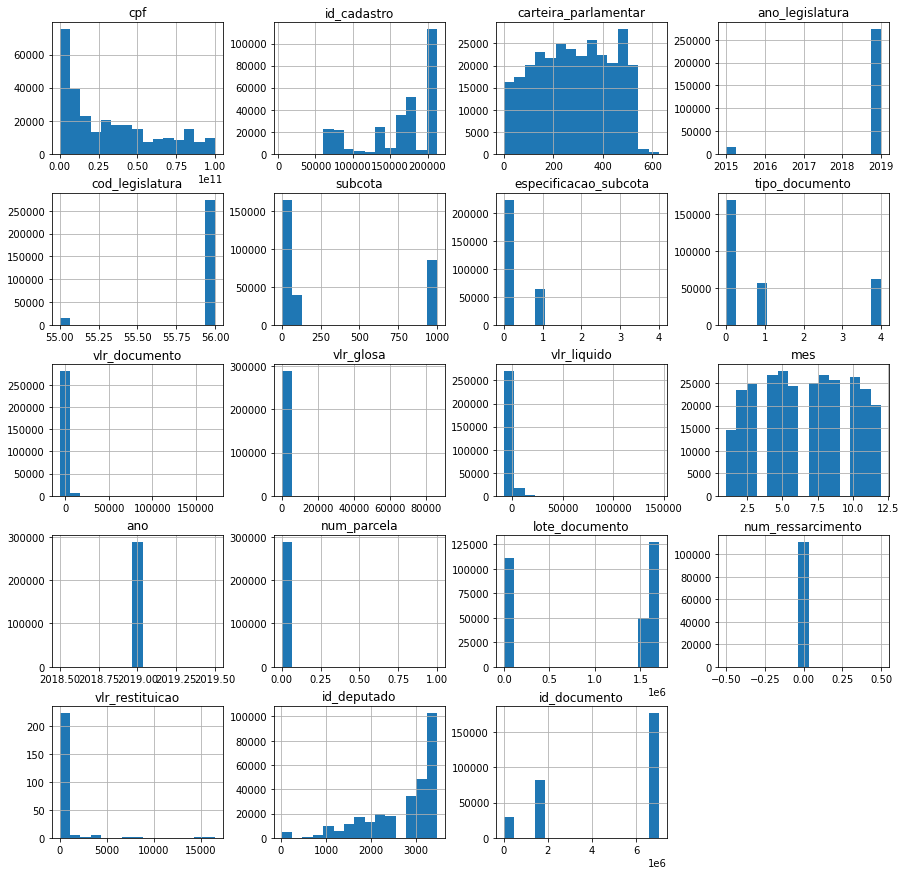

In [16]:
df_2019.hist(bins=15, figsize=(15,15))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

# <font color="cian"> DataFrame 2020</font>

In [17]:
dados_2020 = pd.read_csv("/content/Ano_2020.csv", sep=';')
df_2020 = pd.DataFrame(dados_2020)

In [18]:
df_2020.head()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1693866,NaN,NaN,2713,7050172,http://camara.leg.br/cota-parlamentar/nota-fis...
1,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1698547,NaN,NaN,2713,7058437,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1709149,NaN,NaN,2713,7078508,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,4,"CONSULTORIAS, PESQUISAS E TRABALHOS TÉCNICOS.",...,2020,0,NaN,NaN,1730495,NaN,NaN,2713,7123566,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LIDERANÇA DO DEMOCRATAS,NaN,NaN,NaN,2019,NaN,NaN,56,5,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,...,2020,0,NaN,NaN,1703569,NaN,NaN,2713,7067718,http://camara.leg.br/cota-parlamentar/nota-fis...


In [19]:
df_2020.shape

(160903, 31)

In [20]:
display(df_2020.dtypes)

txNomeParlamentar             object
cpf                          float64
ideCadastro                  float64
nuCarteiraParlamentar        float64
nuLegislatura                  int64
sgUF                          object
sgPartido                     object
codLegislatura                 int64
numSubCota                     int64
txtDescricao                  object
numEspecificacaoSubCota        int64
txtDescricaoEspecificacao     object
txtFornecedor                 object
txtCNPJCPF                    object
txtNumero                     object
indTipoDocumento               int64
datEmissao                    object
vlrDocumento                 float64
vlrGlosa                     float64
vlrLiquido                   float64
numMes                         int64
numAno                         int64
numParcela                     int64
txtPassageiro                 object
txtTrecho                     object
numLote                        int64
numRessarcimento             float64
v

In [21]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160903 entries, 0 to 160902
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          160903 non-null  object 
 1   cpf                        160511 non-null  float64
 2   ideCadastro                160511 non-null  float64
 3   nuCarteiraParlamentar      160511 non-null  float64
 4   nuLegislatura              160903 non-null  int64  
 5   sgUF                       160511 non-null  object 
 6   sgPartido                  160511 non-null  object 
 7   codLegislatura             160903 non-null  int64  
 8   numSubCota                 160903 non-null  int64  
 9   txtDescricao               160903 non-null  object 
 10  numEspecificacaoSubCota    160903 non-null  int64  
 11  txtDescricaoEspecificacao  39924 non-null   object 
 12  txtFornecedor              160885 non-null  object 
 13  txtCNPJCPF                 14

In [22]:
# Conferir a existência de dados
(df_2020.isnull().sum() / df_2020.shape[0]).sort_values(ascending=False)

vlrRestituicao               0.999366
txtTrecho                    0.820457
txtPassageiro                0.819034
txtDescricaoEspecificacao    0.751875
numRessarcimento             0.719632
urlDocumento                 0.338440
txtCNPJCPF                   0.072572
datEmissao                   0.036767
cpf                          0.002436
ideCadastro                  0.002436
nuCarteiraParlamentar        0.002436
sgUF                         0.002436
sgPartido                    0.002436
txtFornecedor                0.000112
numParcela                   0.000000
numLote                      0.000000
numMes                       0.000000
nuDeputadoId                 0.000000
ideDocumento                 0.000000
numAno                       0.000000
txNomeParlamentar            0.000000
vlrLiquido                   0.000000
vlrGlosa                     0.000000
vlrDocumento                 0.000000
txtNumero                    0.000000
numEspecificacaoSubCota      0.000000
txtDescricao

In [23]:
df_2020.columns

Index(['txNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota',
       'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes',
       'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento',
       'urlDocumento'],
      dtype='object')

In [24]:
df_2020.columns = ['nome_parlamentar', 'cpf', 'id_cadastro', 'carteira_parlamentar',
       'ano_legislatura', 'UF', 'partido', 'cod_legislatura', 'subcota',
       'descricao', 'especificacao_subcota', 'descricao_especificacao',
       'fornecedor', 'CNPJCPF_fornecedor', 'numero_documento', 'tipo_documento',
       'data_emissao', 'vlr_documento', 'vlr_glosa', 'vlr_liquido', 'mes',
       'ano', 'num_parcela', 'passageiro', 'trecho', 'lote_documento',
       'num_ressarcimento', 'vlr_restituicao', 'id_deputado', 'id_documento',
       'url_documento']

In [25]:
df_2020.index

RangeIndex(start=0, stop=160903, step=1)

In [26]:
df_2020.describe()

,cpf,id_cadastro,carteira_parlamentar,ano_legislatura,cod_legislatura,subcota,especificacao_subcota,tipo_documento,vlr_documento,vlr_glosa,vlr_liquido,mes,ano,num_parcela,lote_documento,num_ressarcimento,vlr_restituicao,id_deputado,id_documento
count,1.605110e+05,160511.000000,160511.000000,160903.0,160903.0,160903.000000,160903.000000,160903.000000,160903.000000,160903.000000,160903.000000,160903.000000,160903.0,160903.000000,1.609030e+05,45112.0,102.000000,160903.000000,1.609030e+05
mean,3.249773e+10,167954.205924,288.479020,2019.0,56.0,198.412503,0.254936,0.911077,1075.366407,4.478528,948.505273,6.337924,2020.0,0.000124,1.228030e+06,0.0,1760.886667,2773.379763,5.277405e+06
std,2.955384e+10,45242.578724,152.619532,0.0,0.0,376.257639,0.463162,1.484917,2975.777188,91.772129,3009.735815,3.692081,0.0,0.011148,7.667087e+05,0.0,3004.485401,755.901025,2.913218e+06
min,1.608657e+06,62881.000000,1.000000,2019.0,56.0,1.000000,0.000000,0.000000,-3977.900000,0.000000,-4484.580000,1.000000,2020.0,0.000000,0.000000e+00,0.0,6.880000,74.000000,0.000000e+00
25%,6.460033e+09,143084.000000,160.000000,2019.0,56.0,3.000000,0.000000,0.000000,85.000000,0.000000,49.040000,3.000000,2020.0,0.000000,0.000000e+00,0.0,116.542500,2300.000000,1.738880e+06
50%,2.227515e+10,178964.000000,292.000000,2019.0,56.0,10.000000,0.000000,0.000000,213.120000,0.000000,180.000000,6.000000,2020.0,0.000000,1.693244e+06,0.0,254.480000,3163.000000,7.048826e+06
75%,5.162509e+10,204454.000000,426.000000,2019.0,56.0,122.000000,0.000000,1.000000,826.825000,0.000000,620.855000,10.000000,2020.0,0.000000,1.717930e+06,0.0,2058.825000,3320.000000,7.095838e+06
max,9.989866e+10,214694.000000,565.000000,2019.0,56.0,999.000000,4.000000,4.000000,151260.000000,13666.700000,151260.000000,12.000000,2020.0,1.000000,1.760905e+06,0.0,20000.000000,3473.000000,7.184801e+06


In [27]:
df_2020.isnull()

,nome_parlamentar,cpf,id_cadastro,carteira_parlamentar,ano_legislatura,UF,partido,cod_legislatura,subcota,descricao,...,ano,num_parcela,passageiro,trecho,lote_documento,num_ressarcimento,vlr_restituicao,id_deputado,id_documento,url_documento
0,False,True,True,True,False,True,True,False,False,False,...,False,False,True,True,False,True,True,False,False,False
1,False,True,True,True,False,True,True,False,False,False,...,False,False,True,True,False,True,True,False,False,False
2,False,True,True,True,False,True,True,False,False,False,...,False,False,True,True,False,True,True,False,False,False
3,False,True,True,True,False,True,True,False,False,False,...,False,False,True,True,False,True,True,False,False,False
4,False,True,True,True,False,True,True,False,False,False,...,False,False,True,True,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
160899,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
160900,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
160901,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


## <font color="green"> Histograma 2020

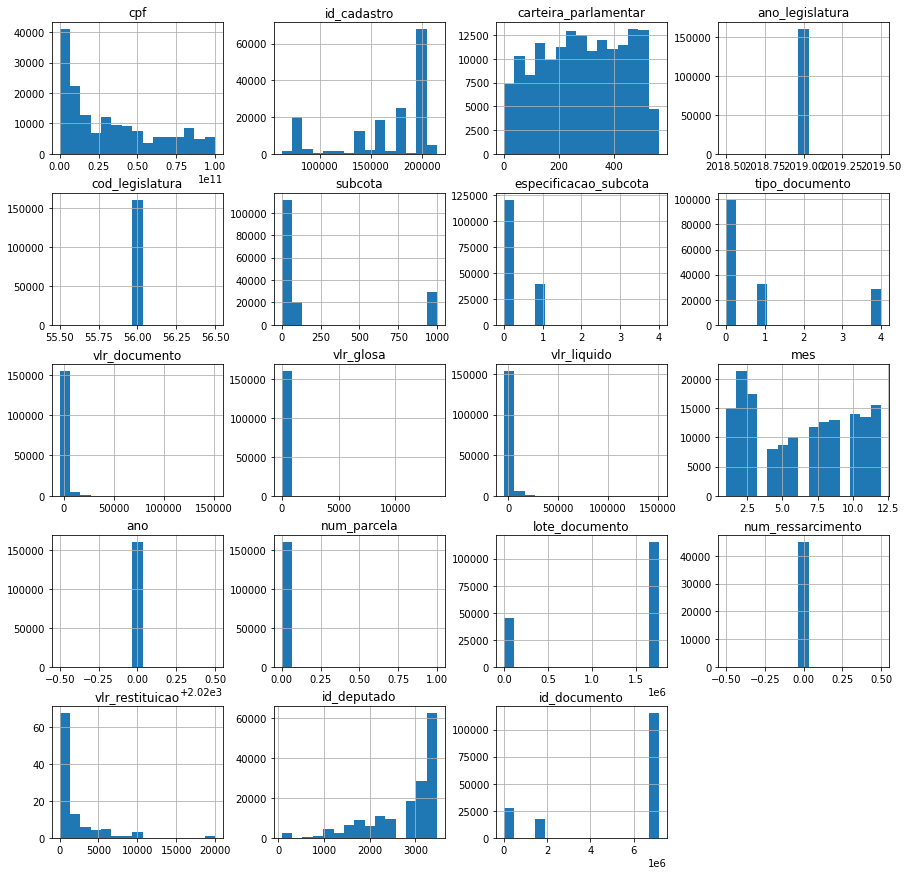

In [28]:
df_2020.hist(bins=15, figsize=(15,15))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

# <font color="cian"> DataFrame 2021</font>

In [29]:
dados_2021 = pd.read_csv("/content/Ano_2021.csv", sep=';')
df_2021 = pd.DataFrame(dados_2021)

In [30]:
df_2021.head()

,txNomeParlamentar,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
0,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2021,0,NaN,NaN,1751471,NaN,NaN,3453,7165735,http://camara.leg.br/cota-parlamentar/nota-fis...
1,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2021,0,NaN,NaN,1752542,NaN,NaN,3453,7167891,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2021,0,NaN,NaN,1753004,NaN,NaN,3453,7168798,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2021,0,NaN,NaN,1758032,NaN,NaN,3453,7178054,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LIDERANÇA DO CIDADANIA,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,...,2021,0,NaN,NaN,1760213,NaN,NaN,3453,7183245,http://camara.leg.br/cota-parlamentar/nota-fis...


In [31]:
df_2021.shape

(105605, 31)

In [32]:
display(df_2021.dtypes)

txNomeParlamentar             object
cpf                          float64
ideCadastro                  float64
nuCarteiraParlamentar        float64
nuLegislatura                  int64
sgUF                          object
sgPartido                     object
codLegislatura                 int64
numSubCota                     int64
txtDescricao                  object
numEspecificacaoSubCota        int64
txtDescricaoEspecificacao     object
txtFornecedor                 object
txtCNPJCPF                    object
txtNumero                     object
indTipoDocumento               int64
datEmissao                    object
vlrDocumento                 float64
vlrGlosa                     float64
vlrLiquido                   float64
numMes                         int64
numAno                         int64
numParcela                     int64
txtPassageiro                 object
txtTrecho                     object
numLote                        int64
numRessarcimento             float64
v

In [33]:
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105605 entries, 0 to 105604
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   txNomeParlamentar          105605 non-null  object 
 1   cpf                        105161 non-null  float64
 2   ideCadastro                105161 non-null  float64
 3   nuCarteiraParlamentar      105161 non-null  float64
 4   nuLegislatura              105605 non-null  int64  
 5   sgUF                       105161 non-null  object 
 6   sgPartido                  105161 non-null  object 
 7   codLegislatura             105605 non-null  int64  
 8   numSubCota                 105605 non-null  int64  
 9   txtDescricao               105605 non-null  object 
 10  numEspecificacaoSubCota    105605 non-null  int64  
 11  txtDescricaoEspecificacao  31488 non-null   object 
 12  txtFornecedor              105605 non-null  object 
 13  txtCNPJCPF                 97

In [34]:
# Conferir a existência de dados
(df_2021.isnull().sum() / df_2021.shape[0]).sort_values(ascending=False)

vlrRestituicao               0.999801
txtTrecho                    0.864334
txtPassageiro                0.863103
numRessarcimento             0.770589
txtDescricaoEspecificacao    0.701832
urlDocumento                 0.285763
txtCNPJCPF                   0.079684
datEmissao                   0.033729
sgPartido                    0.004204
sgUF                         0.004204
nuCarteiraParlamentar        0.004204
ideCadastro                  0.004204
cpf                          0.004204
nuDeputadoId                 0.000000
numMes                       0.000000
numLote                      0.000000
ideDocumento                 0.000000
numParcela                   0.000000
numAno                       0.000000
txNomeParlamentar            0.000000
vlrLiquido                   0.000000
vlrGlosa                     0.000000
vlrDocumento                 0.000000
txtNumero                    0.000000
txtFornecedor                0.000000
numEspecificacaoSubCota      0.000000
txtDescricao

In [35]:
df_2021.columns

Index(['txNomeParlamentar', 'cpf', 'ideCadastro', 'nuCarteiraParlamentar',
       'nuLegislatura', 'sgUF', 'sgPartido', 'codLegislatura', 'numSubCota',
       'txtDescricao', 'numEspecificacaoSubCota', 'txtDescricaoEspecificacao',
       'txtFornecedor', 'txtCNPJCPF', 'txtNumero', 'indTipoDocumento',
       'datEmissao', 'vlrDocumento', 'vlrGlosa', 'vlrLiquido', 'numMes',
       'numAno', 'numParcela', 'txtPassageiro', 'txtTrecho', 'numLote',
       'numRessarcimento', 'vlrRestituicao', 'nuDeputadoId', 'ideDocumento',
       'urlDocumento'],
      dtype='object')

In [36]:
df_2021.columns = ['nome_parlamentar', 'cpf', 'id_cadastro', 'carteira_parlamentar',
       'ano_legislatura', 'UF', 'partido', 'cod_legislatura', 'subcota',
       'descricao', 'especificacao_subcota', 'descricao_especificacao',
       'fornecedor', 'CNPJCPF_fornecedor', 'numero_documento', 'tipo_documento',
       'data_emissao', 'vlr_documento', 'vlr_glosa', 'vlr_liquido', 'mes',
       'ano', 'num_parcela', 'passageiro', 'trecho', 'lote_documento',
       'num_ressarcimento', 'vlr_restituicao', 'id_deputado', 'id_documento',
       'url_documento']

In [37]:
df_2021.index

RangeIndex(start=0, stop=105605, step=1)

In [38]:
df_2021.describe()

,cpf,id_cadastro,carteira_parlamentar,ano_legislatura,cod_legislatura,subcota,especificacao_subcota,tipo_documento,vlr_documento,vlr_glosa,vlr_liquido,mes,ano,num_parcela,lote_documento,num_ressarcimento,vlr_restituicao,id_deputado,id_documento
count,1.051610e+05,105161.000000,105161.000000,105605.0,105605.0,105605.000000,105605.000000,105605.000000,105605.000000,105605.000000,105605.000000,105605.000000,105605.0,105605.000000,1.056050e+05,24227.0,21.000000,105605.000000,1.056050e+05
mean,3.216054e+10,167351.018220,298.609313,2019.0,56.0,155.421571,0.305118,1.115979,991.113688,4.013078,859.597821,4.247867,2021.0,0.000246,1.359831e+06,0.0,1991.111429,2763.788968,5.643242e+06
std,2.930706e+10,45849.317205,157.729408,0.0,0.0,336.247977,0.486908,1.617029,2431.782523,55.135975,2472.922388,2.080516,0.0,0.015689,7.420684e+05,0.0,3671.763236,766.139076,2.862730e+06
min,1.608657e+06,62881.000000,1.000000,2019.0,56.0,1.000000,0.000000,0.000000,-2350.530000,0.000000,-5784.200000,1.000000,2021.0,0.000000,0.000000e+00,0.0,8.700000,74.000000,0.000000e+00
25%,5.823530e+09,141531.000000,165.000000,2019.0,56.0,3.000000,0.000000,0.000000,88.000000,0.000000,50.000000,2.000000,2021.0,0.000000,1.740378e+06,0.0,160.000000,2281.000000,7.143898e+06
50%,2.227515e+10,178963.000000,300.000000,2019.0,56.0,5.000000,0.000000,0.000000,220.140000,0.000000,192.040000,4.000000,2021.0,0.000000,1.758069e+06,0.0,214.980000,3086.000000,7.178492e+06
75%,5.115067e+10,204453.000000,441.000000,2019.0,56.0,120.000000,1.000000,1.000000,708.900000,0.000000,486.000000,6.000000,2021.0,0.000000,1.773798e+06,0.0,1229.510000,3322.000000,7.211141e+06
max,9.989866e+10,217330.000000,590.000000,2019.0,56.0,999.000000,4.000000,4.000000,83750.000000,5410.000000,83750.000000,8.000000,2021.0,1.000000,1.789366e+06,0.0,11880.000000,3487.000000,7.245337e+06


In [39]:
df_2021.isnull()

,nome_parlamentar,cpf,id_cadastro,carteira_parlamentar,ano_legislatura,UF,partido,cod_legislatura,subcota,descricao,...,ano,num_parcela,passageiro,trecho,lote_documento,num_ressarcimento,vlr_restituicao,id_deputado,id_documento,url_documento
0,False,True,True,True,False,True,True,False,False,False,...,False,False,True,True,False,True,True,False,False,False
1,False,True,True,True,False,True,True,False,False,False,...,False,False,True,True,False,True,True,False,False,False
2,False,True,True,True,False,True,True,False,False,False,...,False,False,True,True,False,True,True,False,False,False
3,False,True,True,True,False,True,True,False,False,False,...,False,False,True,True,False,True,True,False,False,False
4,False,True,True,True,False,True,True,False,False,False,...,False,False,True,True,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105600,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,True,False,False,False
105601,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,True,False,False,False
105602,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,True,True,False,False,False
105603,False,False,False,False,False,False,False,False,False,False,...,False,False,True,True,False,False,True,False,False,True


## <font color="green"> Histograma 2021

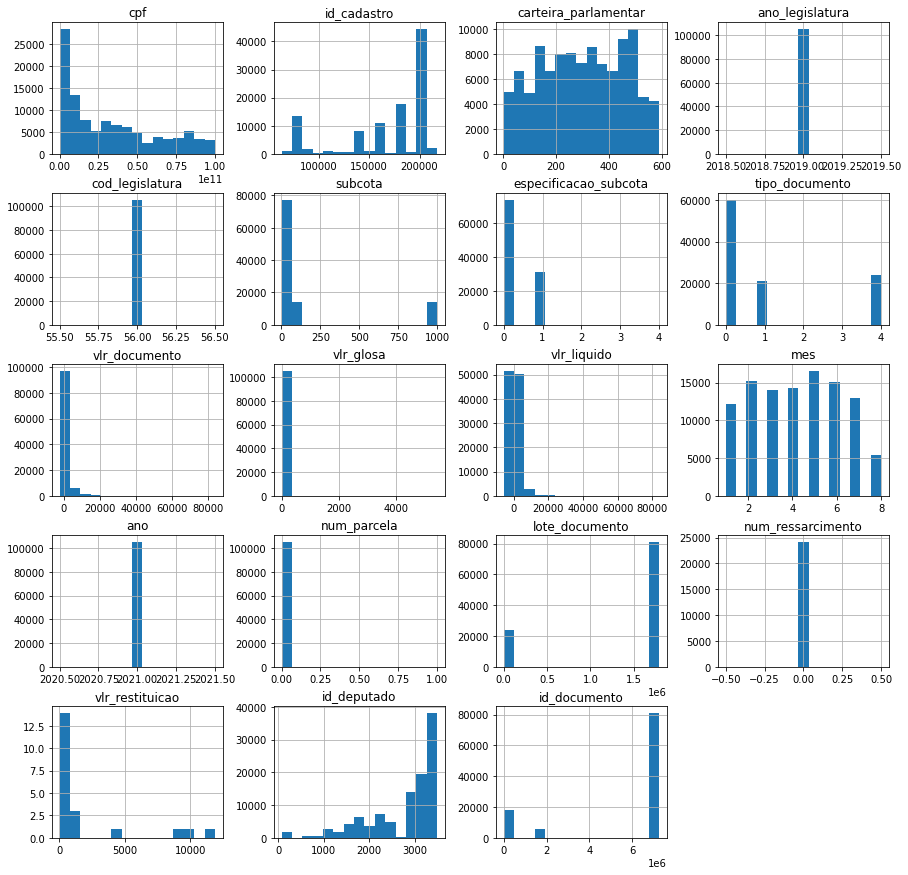

In [40]:
df_2021.hist(bins=15, figsize=(15,15))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

# <font color="cian">DataFrame Concatenado</font>

In [41]:
pd.set_option("display.max_rows", 150, "display.max_columns", 35)

In [42]:
df_unico = pd.concat([dados_2019, dados_2020, dados_2021], ignore_index=True)

In [43]:
df_unico.head()

,nome_parlamentar,cpf,id_cadastro,carteira_parlamentar,ano_legislatura,UF,partido,cod_legislatura,subcota,descricao,especificacao_subcota,descricao_especificacao,fornecedor,CNPJCPF_fornecedor,numero_documento,tipo_documento,data_emissao,vlr_documento,vlr_glosa,vlr_liquido,mes,ano,num_parcela,passageiro,trecho,lote_documento,num_ressarcimento,vlr_restituicao,id_deputado,id_documento,url_documento
0,LID.GOV-CD,NaN,NaN,NaN,2015,NaN,NaN,55,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,CRISTIANE FERREIRA EPP,037.139.030/0010-8,693,4,2019-01-16T00:00:00,111.30,0.0,111.30,1,2019,0,NaN,NaN,1554246,NaN,NaN,2812,6738121,http://camara.leg.br/cota-parlamentar/nota-fis...
1,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,CRISTIANE FERREIRA EPP,037.139.030/0010-8,716,4,2019-02-04T00:00:00,117.19,0.0,117.19,2,2019,0,NaN,NaN,1570078,NaN,NaN,2812,6769606,http://camara.leg.br/cota-parlamentar/nota-fis...
2,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,CRISTIANE FERREIRA EPP,037.139.030/0010-8,723,4,2019-02-25T00:00:00,120.15,0.0,120.15,2,2019,0,NaN,NaN,1570503,NaN,NaN,2812,6771099,http://camara.leg.br/cota-parlamentar/nota-fis...
3,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,CRISTIANE FERREIRA EPP,037.139.030/0010-8,753,4,2019-03-28T00:00:00,151.18,0.0,151.18,3,2019,0,NaN,NaN,1579375,NaN,NaN,2812,6793690,http://camara.leg.br/cota-parlamentar/nota-fis...
4,LID.GOV-CD,NaN,NaN,NaN,2019,NaN,NaN,56,13,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,0,NaN,PANIFICADORA FERREIRA NETO LTDA - EPP,037.139.030/0010-8,791,4,2019-05-07T00:00:00,119.90,0.0,119.90,5,2019,0,NaN,NaN,1590980,NaN,NaN,2812,6821674,http://camara.leg.br/cota-parlamentar/nota-fis...


In [44]:
df_unico.shape

(555500, 31)

In [45]:
df_unico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555500 entries, 0 to 555499
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   nome_parlamentar         555500 non-null  object 
 1   cpf                      553661 non-null  float64
 2   id_cadastro              553759 non-null  float64
 3   carteira_parlamentar     553759 non-null  float64
 4   ano_legislatura          555500 non-null  int64  
 5   UF                       553759 non-null  object 
 6   partido                  553759 non-null  object 
 7   cod_legislatura          555500 non-null  int64  
 8   subcota                  555500 non-null  int64  
 9   descricao                555500 non-null  object 
 10  especificacao_subcota    555500 non-null  int64  
 11  descricao_especificacao  136177 non-null  object 
 12  fornecedor               555467 non-null  object 
 13  CNPJCPF_fornecedor       531710 non-null  object 
 14  nume

In [46]:
display(df_unico.dtypes)

nome_parlamentar            object
cpf                        float64
id_cadastro                float64
carteira_parlamentar       float64
ano_legislatura              int64
UF                          object
partido                     object
cod_legislatura              int64
subcota                      int64
descricao                   object
especificacao_subcota        int64
descricao_especificacao     object
fornecedor                  object
CNPJCPF_fornecedor          object
numero_documento            object
tipo_documento               int64
data_emissao                object
vlr_documento              float64
vlr_glosa                  float64
vlr_liquido                float64
mes                          int64
ano                          int64
num_parcela                  int64
passageiro                  object
trecho                      object
lote_documento               int64
num_ressarcimento          float64
vlr_restituicao            float64
id_deputado         

In [47]:
df_unico.duplicated().values.sum()

0

In [82]:
# Conferir a existência de dados
pd.DataFrame((df_unico.isnull().sum() / df_unico.shape[0]).sort_values(ascending=False))

,0
vlr_restituicao,0.999345
trecho,0.768810
passageiro,0.766889
descricao_especificacao,0.754857
num_ressarcimento,0.674452
url_documento,0.370587
CNPJCPF_fornecedor,0.042826
data_emissao,0.028173
cpf,0.003311
id_cadastro,0.003134


In [49]:
df_unico.columns

Index(['nome_parlamentar', 'cpf', 'id_cadastro', 'carteira_parlamentar',
       'ano_legislatura', 'UF', 'partido', 'cod_legislatura', 'subcota',
       'descricao', 'especificacao_subcota', 'descricao_especificacao',
       'fornecedor', 'CNPJCPF_fornecedor', 'numero_documento',
       'tipo_documento', 'data_emissao', 'vlr_documento', 'vlr_glosa',
       'vlr_liquido', 'mes', 'ano', 'num_parcela', 'passageiro', 'trecho',
       'lote_documento', 'num_ressarcimento', 'vlr_restituicao', 'id_deputado',
       'id_documento', 'url_documento'],
      dtype='object')

In [50]:
df_unico.columns = ['nome_parlamentar', 'cpf', 'id_cadastro', 'carteira_parlamentar',
       'ano_legislatura', 'UF', 'partido', 'cod_legislatura', 'subcota',
       'descricao', 'especificacao_subcota', 'descricao_especificacao',
       'fornecedor', 'CNPJCPF_fornecedor', 'numero_documento', 'tipo_documento',
       'data_emissao', 'vlr_documento', 'vlr_glosa', 'vlr_liquido', 'mes',
       'ano', 'num_parcela', 'passageiro', 'trecho', 'lote_documento',
       'num_ressarcimento', 'vlr_restituicao', 'id_deputado', 'id_documento',
       'url_documento']

In [51]:
#df_unico['data_emissao'] = pd.to_datetime(df_unico['data_emissao'], errors='coerce', dayfirst=True)
df_unico['data_emissao'] = pd.to_datetime(df_unico['data_emissao'], format='%Y-%m-%d').dt.strftime('%d/%m/%Y')

In [52]:
df_unico.columns

Index(['nome_parlamentar', 'cpf', 'id_cadastro', 'carteira_parlamentar',
       'ano_legislatura', 'UF', 'partido', 'cod_legislatura', 'subcota',
       'descricao', 'especificacao_subcota', 'descricao_especificacao',
       'fornecedor', 'CNPJCPF_fornecedor', 'numero_documento',
       'tipo_documento', 'data_emissao', 'vlr_documento', 'vlr_glosa',
       'vlr_liquido', 'mes', 'ano', 'num_parcela', 'passageiro', 'trecho',
       'lote_documento', 'num_ressarcimento', 'vlr_restituicao', 'id_deputado',
       'id_documento', 'url_documento'],
      dtype='object')

In [78]:
pd.DataFrame(round(df_unico.isnull().mean()*100, 2))

,0
nome_parlamentar,0.00
cpf,0.33
id_cadastro,0.31
carteira_parlamentar,0.31
ano_legislatura,0.00
UF,0.31
partido,0.31
cod_legislatura,0.00
subcota,0.00
descricao,0.00


In [54]:
round(df_unico.describe())

,cpf,id_cadastro,carteira_parlamentar,ano_legislatura,cod_legislatura,subcota,especificacao_subcota,tipo_documento,vlr_documento,vlr_glosa,vlr_liquido,mes,ano,num_parcela,lote_documento,num_ressarcimento,vlr_restituicao,id_deputado,id_documento
count,5.536610e+05,553759.0,553759.0,555500.0,555500.0,555500.0,555500.0,555500.0,555500.0,555500.0,555500.0,555500.0,555500.0,555500.0,555500.0,180842.0,364.0,555500.0,555500.0
mean,3.208493e+10,166015.0,289.0,2019.0,56.0,251.0,0.0,1.0,884.0,4.0,809.0,6.0,2020.0,0.0,1130421.0,0.0,874.0,2734.0,5045073.0
std,2.921625e+10,45865.0,153.0,1.0,0.0,412.0,0.0,2.0,2465.0,139.0,2464.0,3.0,1.0,0.0,787236.0,0.0,2368.0,773.0,2865350.0
min,1.608657e+06,4930.0,1.0,2015.0,55.0,1.0,0.0,0.0,-6606.0,0.0,-7821.0,1.0,2019.0,0.0,0.0,0.0,1.0,19.0,0.0
25%,6.197278e+09,141531.0,160.0,2019.0,56.0,3.0,0.0,0.0,63.0,0.0,50.0,3.0,2019.0,0.0,0.0,0.0,7.0,2265.0,1705442.0
50%,2.227515e+10,178938.0,292.0,2019.0,56.0,10.0,0.0,0.0,201.0,0.0,184.0,6.0,2019.0,0.0,1620008.0,0.0,26.0,3062.0,6888214.0
75%,5.098035e+10,204449.0,424.0,2019.0,56.0,122.0,0.0,1.0,748.0,0.0,642.0,9.0,2020.0,0.0,1707915.0,0.0,277.0,3312.0,7075930.0
max,9.989866e+10,217330.0,627.0,2019.0,56.0,999.0,4.0,4.0,172000.0,86000.0,151260.0,12.0,2021.0,1.0,1789366.0,0.0,20000.0,3487.0,7245337.0


In [55]:
round(df_unico.describe().T, 2)

,count,mean,std,min,25%,50%,75%,max
cpf,553661.0,3.208493e+10,2.921625e+10,1608657.00,6.197278e+09,2.227515e+10,5.098035e+10,9.989866e+10
id_cadastro,553759.0,1.660153e+05,4.586451e+04,4930.00,1.415310e+05,1.789380e+05,2.044490e+05,2.173300e+05
carteira_parlamentar,553759.0,2.890100e+02,1.531300e+02,1.00,1.600000e+02,2.920000e+02,4.240000e+02,6.270000e+02
ano_legislatura,555500.0,2.018890e+03,6.400000e-01,2015.00,2.019000e+03,2.019000e+03,2.019000e+03,2.019000e+03
cod_legislatura,555500.0,5.597000e+01,1.600000e-01,55.00,5.600000e+01,5.600000e+01,5.600000e+01,5.600000e+01
subcota,555500.0,2.506600e+02,4.120700e+02,1.00,3.000000e+00,1.000000e+01,1.220000e+02,9.990000e+02
especificacao_subcota,555500.0,2.500000e-01,4.600000e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
tipo_documento,555500.0,1.030000e+00,1.570000e+00,0.00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+00
vlr_documento,555500.0,8.844100e+02,2.464530e+03,-6605.57,6.300000e+01,2.013800e+02,7.476000e+02,1.720000e+05
vlr_glosa,555500.0,3.900000e+00,1.394500e+02,0.00,0.000000e+00,0.000000e+00,0.000000e+00,8.600000e+04


In [56]:
df_unico.isnull()

,nome_parlamentar,cpf,id_cadastro,carteira_parlamentar,ano_legislatura,UF,partido,cod_legislatura,subcota,descricao,especificacao_subcota,descricao_especificacao,fornecedor,CNPJCPF_fornecedor,numero_documento,tipo_documento,data_emissao,vlr_documento,vlr_glosa,vlr_liquido,mes,ano,num_parcela,passageiro,trecho,lote_documento,num_ressarcimento,vlr_restituicao,id_deputado,id_documento,url_documento
0,False,True,True,True,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False,False,False
1,False,True,True,True,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False,False,False
2,False,True,True,True,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False,False,False
3,False,True,True,True,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False,False,False
4,False,True,True,True,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555495,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False,False,False
555496,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False,False,False
555497,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True,True,False,False,False
555498,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,True,False,False,True


## <font color="green"> Histograma DataFrame Concatenado

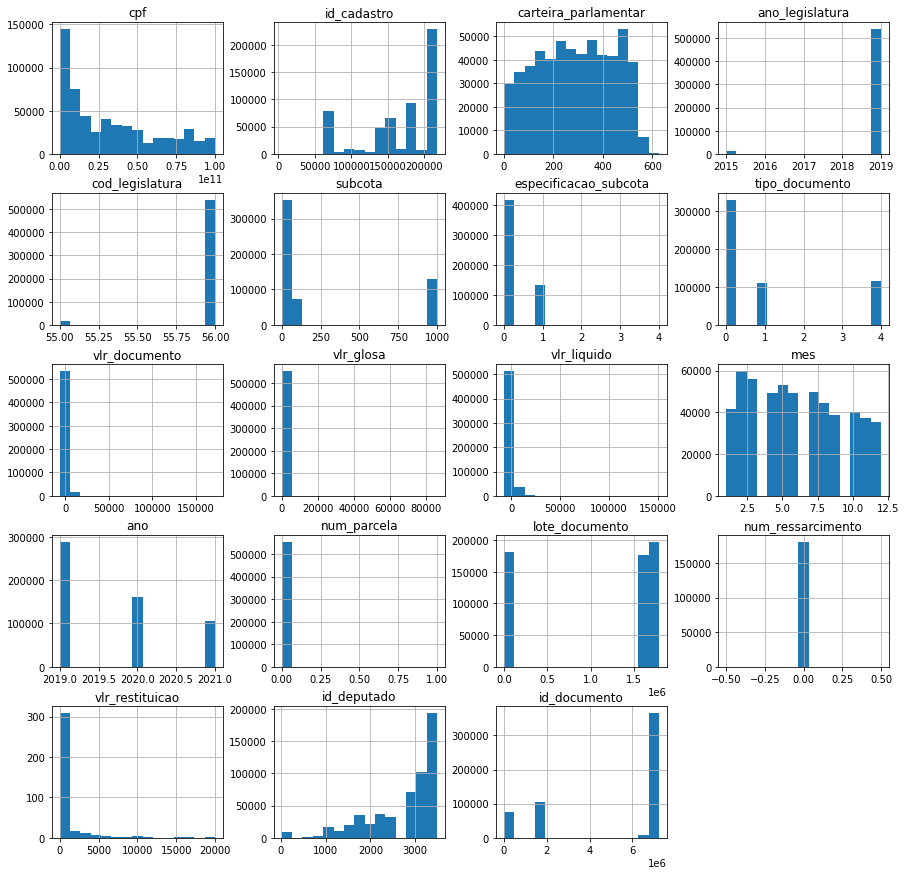

In [57]:
df_unico.hist(bins=15, figsize=(15,15))
#ignorar aviso
np.warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

# <font color = "cian">Exercícios</font>

### <font color='green'>1. Como se comportam os gastos com cotas parlamentares ao longo do tempo? Existe alguma tendência de aumento ou redução desse custo?</font>

In [58]:
df_2019["vlr_liquido"].mean()

712.3467265525929

In [59]:
df_2020["vlr_liquido"].mean()

948.5052734256051

In [60]:
df_2021["vlr_liquido"].mean()

859.5978206524014

In [188]:
df_unico.groupby(["partido", "ano" ])["vlr_liquido"].sum().sort_values(axis=0, ascending=False)

partido        ano 
PT             2019    23989704.30
               2020    18830103.31
PP             2019    16993236.04
PSL            2019    16706505.83
PL             2019    15531657.23
MDB            2019    14970276.23
PSD            2019    14560007.72
PSL            2020    13826361.86
PSDB           2019    13059347.83
PL             2020    12680433.37
REPUBLICANOS   2019    12667816.54
PDT            2019    11424428.69
PSB            2019    11329515.67
DEM            2019    11284146.16
PP             2020    10896969.11
REPUBLICANOS   2020    10715948.04
MDB            2020    10541046.22
PT             2021    10281465.97
PSD            2020    10137504.51
PSDB           2020     9904326.39
PDT            2020     9208808.84
PSL            2021     8206307.11
DEM            2020     8139489.35
PL             2021     7797474.41
PSB            2020     7609609.64
PP             2021     6538895.99
REPUBLICANOS   2021     6265513.58
PSDB           2021     6181059.35


### <font color='green'>2. Qual a média de gastos por parlamentar?</font>


In [ ]:
# pq valores negativos?
df_unico.groupby(["nome_parlamentar"])["vlr_liquido", "vlr_documento", "vlr_glosa"].mean().sort_values(by = "vlr_liquido", axis=0, ascending=False )

### <font color='green'>3. Quais foram os parlamentares que mais e que menos consumiram recursos?</font>


In [ ]:
df_unico.groupby(["nome_parlamentar", "id_cadastro"])["vlr_liquido", "vlr_restituicao"].sum().sort_values(by = "vlr_liquido", axis=0, ascending=False)

### <font color='green'>4. Quais são as categorias de despesas mais onerosas dentre os recursos destinados às cotas parlamentares?</font>


In [ ]:
df_unico.groupby(["descricao"])["vlr_documento", "vlr_liquido"].max().sort_values(by = "vlr_liquido", axis=0, ascending=False)

In [ ]:
pd.DataFrame(df_unico.groupby(["descricao_especificacao"])["vlr_documento"].max())

In [ ]:
df_unico.groupby(["descricao_especificacao"])["vlr_documento"].max()

### <font color='green'>5. Quais são os trechos de viagem mais recorrentes entre as despesas de viagem?


In [ ]:
df_unico.groupby(["trecho"])["vlr_documento", "vlr_liquido"].max().sort_values(by = "vlr_liquido", axis=0, ascending=False)

### <font color='green'>6. Qual a média de gastos por estado?</font>


In [ ]:
#Está correto estes valores?
df_media_estado = df_unico.groupby(["UF"])["vlr_liquido", "vlr_documento"].mean().round(2)
df_media_estado

### <font color='green'>7. Qual é o valor total de gastos por estado?</font>


In [ ]:
pd.DataFrame(df_unico.groupby(["UF"])["vlr_liquido", "vlr_documento"].sum().sort_values("vlr_liquido", axis=0, ascending=False))


In [177]:
df_valor_total_estado = df_unico.groupby(["UF"])["vlr_liquido"].sum().sort_values(axis=0, ascending=False)
df_valor_total_estado.head()

UF
SP    52635438.40
MG    43162671.56
BA    39441897.60
RJ    36707801.80
PR    26785753.60
Name: vlr_liquido, dtype: float64

### <font color='green'>8. Quais estados têm maior número de representantes?</font>


In [139]:
#como alterar titulo na coluna e adicionar nome "Representantes"
representantes_por_estado = df_unico.groupby("UF")["id_cadastro"].nunique().sort_values(axis=0, ascending=False)                  
pd.DataFrame(representantes_por_estado.head())

,id_cadastro
UF,
SP,104
RJ,82
MG,81
BA,56
RS,47


### <font color='green'>9. Há alguma correlação entre a quantidade de parlamentares por estado e o valor total dos gastos?</font>


### <font color='green'>10. Qual a média de gastos por partido?</font>


In [178]:
df_unico.groupby(["partido"])["vlr_liquido", "vlr_documento"].mean().round(2).sort_values(by = "vlr_liquido", axis=0, ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,vlr_liquido,vlr_documento
partido,,
PPL,2246.29,2246.29
S.PART.,1614.39,1765.37
PHS,1295.36,1295.67
PRB,1169.67,1187.84
REDE,1151.66,1272.74
PCdoB,1101.11,1211.21
PSC,1092.36,1243.43
PR,1090.14,1094.88
PROS,1074.20,1218.87


### <font color='green'>11. Quais são os partidos que mais e que menos consumiram a cota parlamentar?</font>


In [147]:
df_unico.groupby(["partido"])["vlr_restituicao", "vlr_liquido", "vlr_documento"].sum().sort_values(by = "vlr_liquido", axis=0, ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,vlr_restituicao,vlr_liquido,vlr_documento
partido,,,
PT,46266.22,53101273.58,56328962.20
PSL,25046.46,38739174.80,44055338.37
PL,22193.98,36009565.01,39694324.59
PP,12551.79,34429101.14,39016501.64
MDB,1658.34,31505872.66,33515100.08
PSD,33378.41,30858143.15,33674722.76
REPUBLICANOS,34439.09,29649278.16,32929513.44
PSDB,40144.39,29144733.57,31084001.21
PDT,14971.71,25918297.00,27426518.15


### <font color='green'>12. Há alguma correlação entre a quantidade de parlamentares por partido e o valor total dos gastos?</font>